In [2]:
import mss
import numpy as np
import matplotlib.pyplot as plt

In [3]:
region = {"top": 210, "left": 96, "width": 580, "height": 149}

In [4]:
def screenshot(region):    
    with mss.mss() as sct:
        return np.array(sct.grab(region))

In [5]:
def clean_img(img):
    img[img < 128] = 0
    img[img >= 128] = 1
    return img

In [6]:
def processed_img():
    img = screenshot(region)
    img = img[:, :, 0]
    img = clean_img(img)
    return img

In [59]:
img = screenshot(region)

In [60]:
img = img[:, :, 0]

In [61]:
img = clean_img(img)

### Analise de distancia para obstaculo aereo

In [3]:
img = np.load('dino_voador_print.npy')

In [62]:
vision = img.copy()

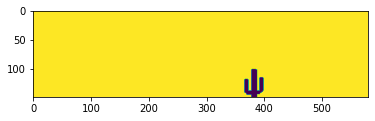

In [63]:
plt.imshow(vision)

In [6]:
minv = vision.T.argmin()

In [7]:
x = minv // 149
x

147

In [8]:
y = minv % 149
y

59

In [9]:
vision[y, :] = 0

In [10]:
vision[:, x] = 0

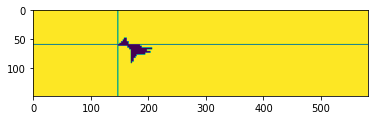

In [11]:
plt.imshow(vision)

### Analise de distancia para obstaculo terrestre

In [51]:
#np.save('cactus_2_print.npy', img)

In [278]:
vision2 = img.copy()

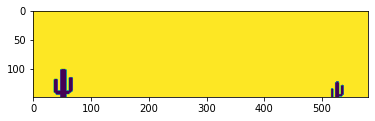

In [279]:
plt.imshow(vision2)

In [280]:
minv = vision2.T.argmin()

In [281]:
x = minv // 149

In [282]:
y = minv % 149

In [283]:
vision2[y, :] = 0

In [284]:
vision2[:, x] = 0

In [76]:
## ======================================================

In [49]:
img = processed_img()

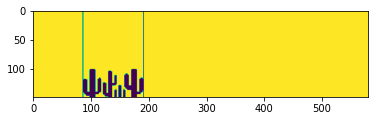

In [55]:
plt.imshow(img)

In [40]:
def calculate_obstacle_length(img):
    indexes = np.argwhere(img.sum(axis=0) != 149).flatten()
    
    for i in range(0, indexes.size - 1):
        if indexes[i + 1] - indexes[i] > 4:
            return indexes[i] - indexes[0]

    return indexes[-1] - indexes[0]

In [51]:
calculate_obstacle_length(img)

105

In [52]:
indexes = np.argwhere(img.sum(axis=0) != 149).flatten()

In [53]:
(indexes[-1],
indexes[0])

(191, 86)

In [54]:
img[:, 191] = 0
img[:, 86] = 0